<a href="https://colab.research.google.com/github/leandroboteon/pandas-analise-vendas-loja-virtual/blob/main/analise_vendas_ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análise de Vendas de uma Loja Virtual**

##### **Métricas desenvolvidas**:
* Departamentos mais vendidos
* Média de preço com frete por nome de departamento
* Quantidade de vendas por mês
* Média de renda para cada tipo de canal de venda
* Média de idade de clientes por bandeira





In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Importação da base de dados e verificação de features

In [2]:
vendas = pd.read_excel("/content/drive/MyDrive/Formação em Dados/Iniciando na Análise/varejo.xlsx")
vendas

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790
...,...,...,...,...,...,...,...,...,...
80223,636930,Aplicativo,B,2023-04-01,879.200,879.200,Telefones e Celulares,RJ,15746
80224,658550,Aplicativo,B,2023-02-18,879.200,879.200,Telefones e Celulares,AM,443
80225,680170,Aplicativo,B,2023-01-22,879.200,879.200,Telefones e Celulares,PB,9349
80226,701790,Aplicativo,B,2023-02-11,879.200,879.200,Telefones e Celulares,PB,10944


In [3]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [4]:
vendas[vendas["Preço"].isnull()].head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones e Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar e Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar e Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones e Celulares,NaN,9121


### Premissa 1: Tratamento de valores nulos
* Na coluna "Preço": completar com a média de preços
* Na coluna "estado": completar com "MS"

In [5]:
media_preco = vendas["Preço"].mean()

vendas["Preço"] = vendas["Preço"].fillna(media_preco)

In [6]:
vendas["estado"] = vendas["estado"].fillna("MS")

#### Agrupamentos para verificar os dados

In [7]:
vendas.groupby("idcanalvenda")["idcompra"].nunique().reset_index()

,idcanalvenda,idcompra
0,APP,139
1,Aplicativo,21425
2,Internet,24515
3,Mobile,24732


In [8]:
vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP", "Aplicativo")

In [9]:
vendas[["Preço", "Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


### Premissa 2: Preço com frete não pode ser superior ao Preço
* Filtro usando .query()

In [10]:
preco_errado = vendas.query("Preço > Preço_com_frete")

vendas_correto = vendas.query("Preço <= Preço_com_frete")
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790
5,456225,Internet,A,2023-03-19,1903.200,1903.200,Telefones e Celulares,SP,23742


In [11]:
vendas_correto[["Preço", "Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,79888.000000,79888.000000
mean,905.450941,910.367219
std,1056.303339,1058.507787
min,6.320000,6.320000
25%,144.320000,151.128000
50%,531.240000,535.200000
75%,1199.200000,1219.120000
max,14439.240000,14439.240000


##### Criação da coluna "mês" e alteração do tipo de dado

In [ ]:
vendas_correto["Mês"] = vendas_correto["Data"].dt.month

In [ ]:
vendas_correto['idcompra'] = vendas_correto['idcompra'].astype("object")

### Importação da base de clientes e verificação de features

In [14]:
cliente = pd.read_excel("/content/drive/MyDrive/Formação em Dados/Iniciando na Análise/cliente_varejo.xlsx")
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


#### Tratamento dos tipos de features
* cliente_Log para object
* renda para float64

In [15]:
vendas_correto["cliente_Log"] = vendas_correto["cliente_Log"].astype(object)
cliente["cliente_Log"] = cliente["cliente_Log"].astype(object)

<ipython-input-15-eee2a7f190dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto["cliente_Log"] = vendas_correto["cliente_Log"].astype(object)


In [16]:
cliente["renda"] = round(cliente["renda"].astype("float"),2)

In [17]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  object 
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 619.5+ KB


### Join da tabela de clientes para a tabela de vendas

In [18]:
vendas_cliente = vendas_correto.merge(cliente, how="left", on="cliente_Log")

In [19]:
vendas_cliente["Nome_Departamento"] = vendas_cliente["Nome_Departamento"].str.replace("TV e Video", "TVs e Acessorios")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mês,idade,renda
0,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590,3,54,2050.0
1,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478,3,47,8258.0
2,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933,1,39,4671.0
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933,1,53,11717.0
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790,3,26,9207.0


### Análise e construção das métricas

#### 1. Departamentos mais vendidos

In [20]:
agg_depto_idcompra = vendas_cliente.groupby("Nome_Departamento")["idcompra"].nunique().sort_values(ascending=False).reset_index()
agg_depto_idcompra.head(5)

,Nome_Departamento,idcompra
0,Telefones e Celulares,14464
1,Eletrodomesticos,10466
2,Eletroportateis,9530
3,TVs e Acessorios,5323
4,Informatica,5273


In [21]:
import matplotlib.pyplot as plt


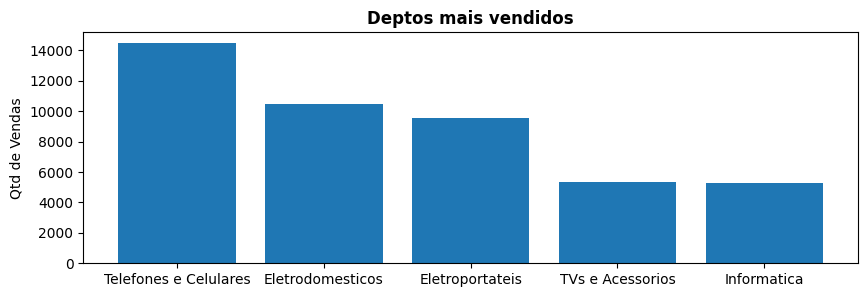

In [22]:
fig_depto_vendas = plt.figure(figsize=(10,3))

plt.bar(agg_depto_idcompra['Nome_Departamento'].head(5), agg_depto_idcompra['idcompra'].head(5))
plt.ylabel("Qtd de Vendas")
plt.title("Deptos mais vendidos", fontsize="12", fontweight="bold");

### Média de preço com frete por nome de departamento

In [23]:
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mês,idade,renda
0,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590,3,54,2050.0
1,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478,3,47,8258.0
2,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933,1,39,4671.0
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933,1,53,11717.0
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790,3,26,9207.0


In [24]:
agg_depto_frete = round(vendas_cliente.groupby("Nome_Departamento")["Preço_com_frete"].mean().sort_values(ascending=False).reset_index(),2)

In [25]:
agg_depto_frete.head(5)

,Nome_Departamento,Preço_com_frete
0,TVs e Acessorios,2083.44
1,Informatica,2025.79
2,Linha Industrial,1685.38
3,Cine e Foto,1664.60
4,Telefones e Celulares,1432.60


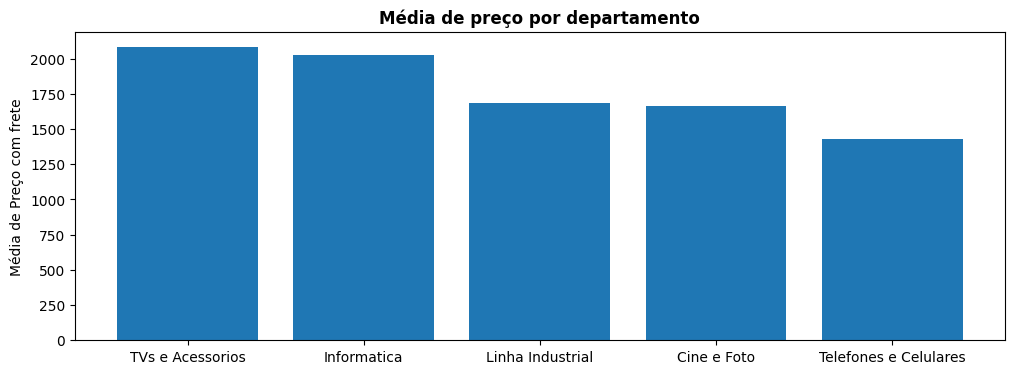

In [26]:
fig_depto_frete = plt.figure(figsize=(12,4))

plt.bar(agg_depto_frete["Nome_Departamento"].head(5),	agg_depto_frete["Preço_com_frete"].head(5))
plt.ylabel("Média de Preço com frete")
plt.title("Média de preço por departamento", fontsize="12", fontweight="bold");

### Quantidade de vendas por mês

In [45]:
agg_vendas_mes = vendas_cliente.groupby("Mês")["idcompra"].nunique().reset_index()
agg_vendas_mes

,Mês,idcompra
0,1,18159
1,2,17332
2,3,18982
3,4,18297


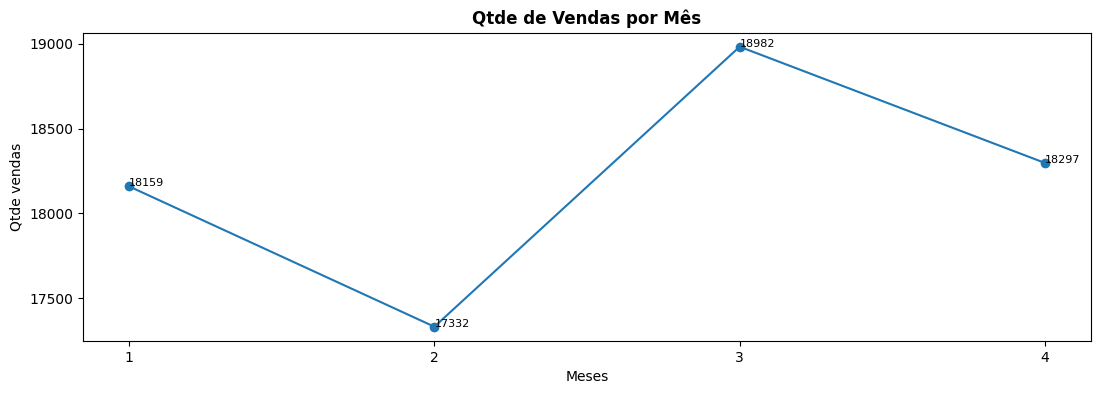

In [67]:
fig_vendas_mes = plt.figure(figsize=(13,4))

x = agg_vendas_mes["Mês"]
y = agg_vendas_mes["idcompra"]

plt.xlabel("Meses")
plt.ylabel("Qtde vendas")
plt.title("Qtde de Vendas por Mês", fontsize="12", fontweight="bold")
plt.xticks(range(0,5,1))
plt.yticks(range(15000,20000,500))
for i in range(len(x)):
    plt.text(x[i], y[i], f'{y[i]}', fontsize="8")

plt.plot(x, y, marker="o");

### Média de renda para cada tipo de canal de venda


In [73]:
agg_renda_canal = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_renda_canal

,idcanalvenda,renda
0,Aplicativo,8239.52
1,Internet,8236.37
2,Mobile,8233.43


''

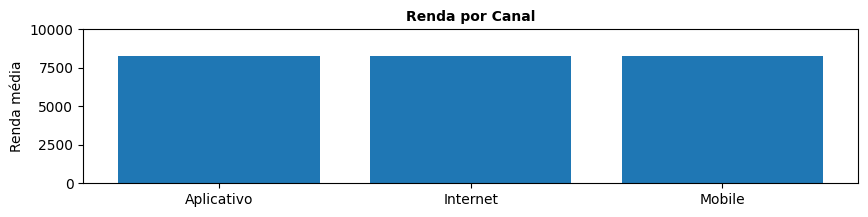

In [84]:
fig_renda_canal = plt.figure(figsize=(10,2))

x= agg_renda_canal["idcanalvenda"]
y= agg_renda_canal["renda"]

plt.bar(x, y)
plt.title("Renda por Canal", fontsize="10", fontweight="bold")
plt.ylabel("Renda média")
plt.yticks(range(0,10001,2500))

;

### Média de idade de clientes por bandeira

In [88]:
agg_bandeira_idade = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").reset_index(),0)
agg_bandeira_idade

,bandeira,idade
0,A,53.0
1,B,53.0


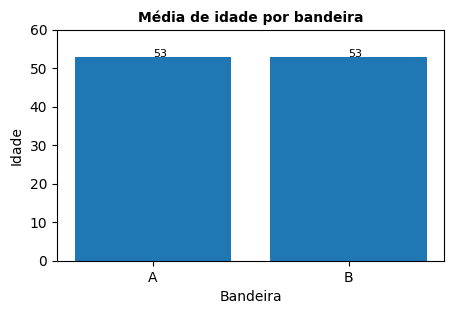

In [98]:
fig_bandeira_idade = plt.figure(figsize=(5,3))

x = agg_bandeira_idade["bandeira"]
y = agg_bandeira_idade["idade"]

plt.bar(x,y)
plt.title("Média de idade por bandeira", fontsize="10", fontweight="bold")
plt.xlabel("Bandeira")
plt.ylabel("Idade")
plt.yticks(range(0,61,10))

for i in range(len(x)):
  plt.text(x[i], y[i], f'{int(y[i])}', fontsize="8")